# Loan Approval Prediction using Machine Learning

Developed by: Nimisha Davis

Linkedin : https://www.linkedin.com/in/nimishadavis/

### Introduction:

Loans are a crucial financial service, enabling individuals to manage education, living expenses, and acquire assets like houses and cars. However, banks must carefully evaluate loan applications based on several factors to mitigate risk and maximize profitability. This project utilizes machine learning to predict the likelihood of loan approval based on applicant profiles, easing decision-making processes for financial institutions.

### Objective:
The primary goal of this project is to predict whether a loan application will be approved or rejected. Key features considered include marital status, education, income, credit history, and other demographic and financial details.

### Dataset Description:

The dataset used for predicting loan approval contains 13 features that provide critical information about the applicant’s profile and financial status. Here's a detailed description of each feature:

1.Loan: A unique identifier for each loan application.

2.Gender: The gender of the applicant (Male/Female).

3.Married: The marital status of the applicant (Yes/No).

4.Dependents: Indicates whether the applicant has any dependents (Yes/No).

5.Education: Whether the applicant is a graduate or not (Graduate/Not Graduate).

6.Self_Employed: Whether the applicant is self-employed (Yes/No).

7.ApplicantIncome: The income of the applicant.

8.CoapplicantIncome: The income of the co-applicant (if applicable).

9.LoanAmount: The amount of the loan applied for (in thousands).

10.Loan_Amount_Term: The duration of the loan (in months).

11.Credit_History: The applicant's credit history, indicating the individual’s ability to repay their debts (1 for a positive credit history, 0 for a 
negative one).

12.Property_Area: The location of the property for which the loan is requested (Rural/Semi-Urban/Urban).

13.Loan_Status: The target variable, which indicates whether the loan was approved (Y for Yes, N for No).

Using this dataset, machine learning models can be trained to predict whether a loan application is likely to be approved or not based on these features, enabling banks to make more efficient and accurate decisions.


### Importing Libraries and Dataset

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("data/LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing and visualization

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [10]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [11]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

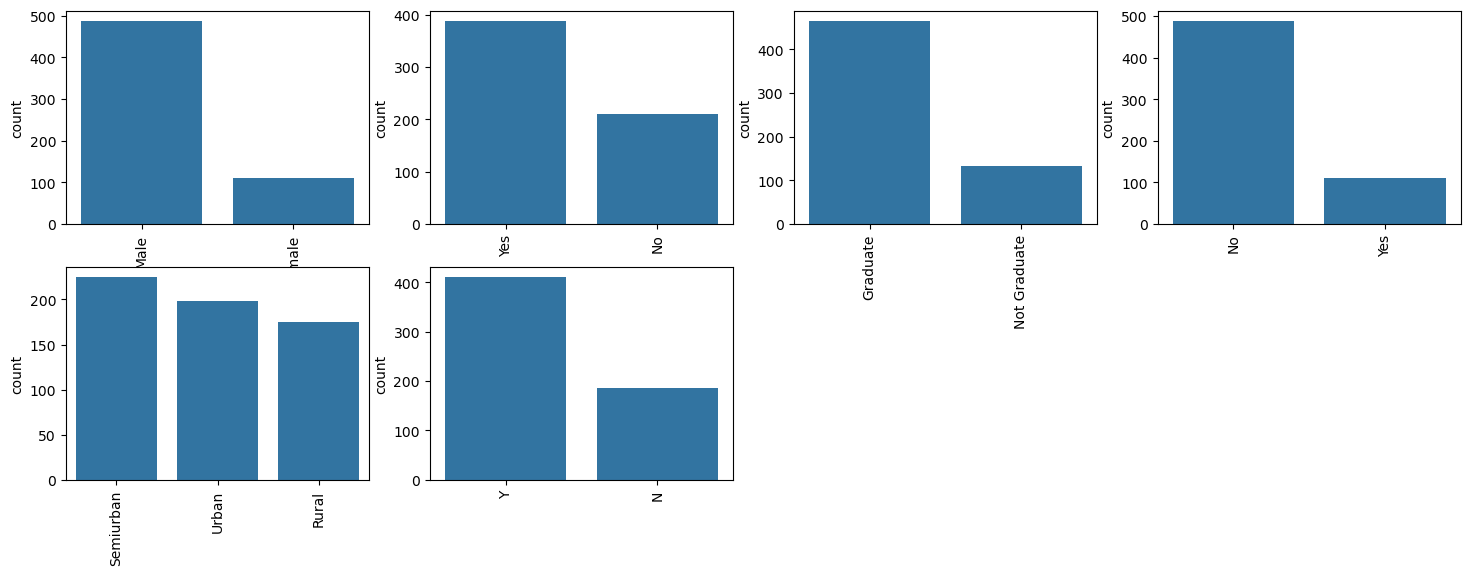

In [12]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [13]:
# Label encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])

In [14]:
# To find the number of columns with 
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [15]:
data.duplicated().sum()

0

<Axes: >

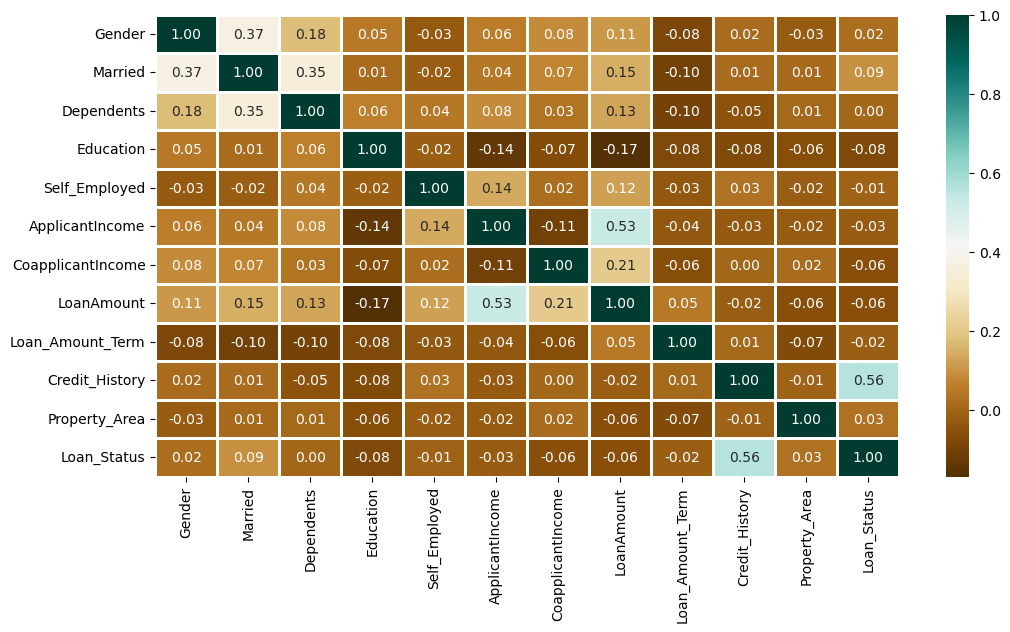

In [16]:
# correlation between Loan Amount and ApplicantIncome. 
# It also shows that Credit_History has a high impact on Loan_Status
plt.figure(figsize=(12,6)) 
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

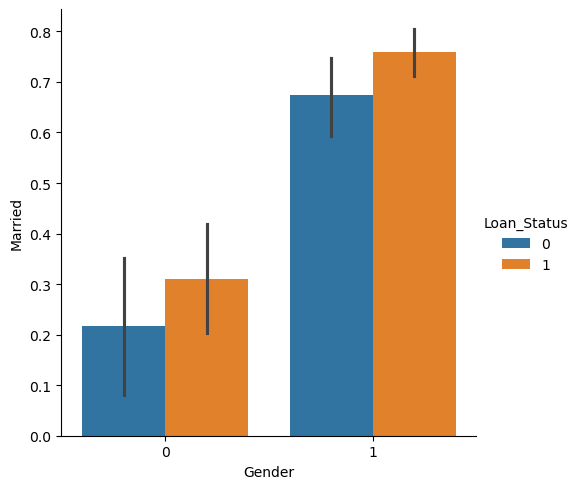

In [17]:
sns.catplot(x="Gender", y="Married", 
			hue="Loan_Status", 
			kind="bar", 
			data=data)

In [18]:
data.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# missing values handling
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean()) 

In [20]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier detection and handling

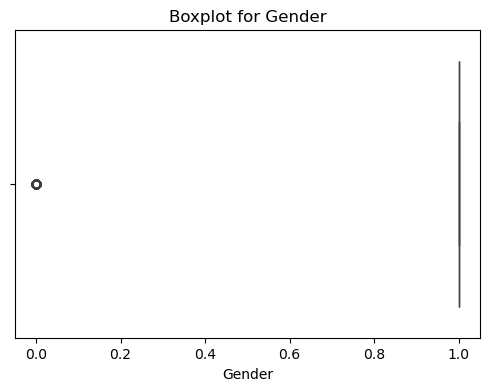

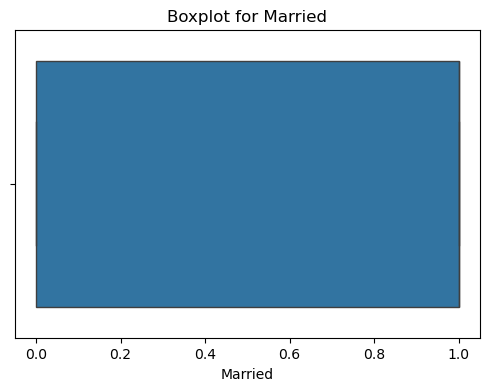

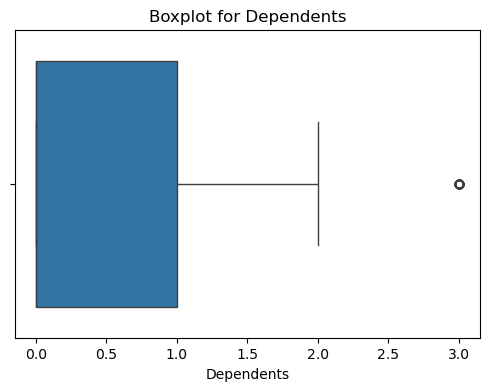

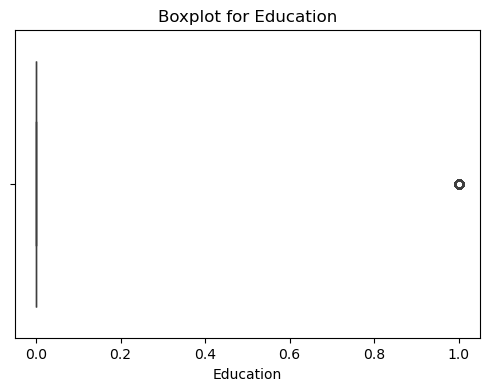

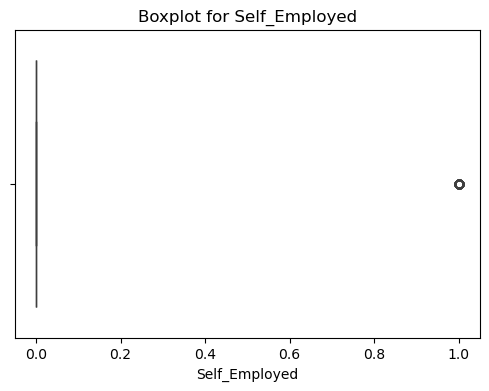

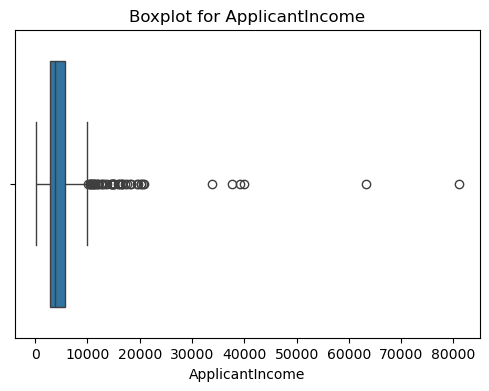

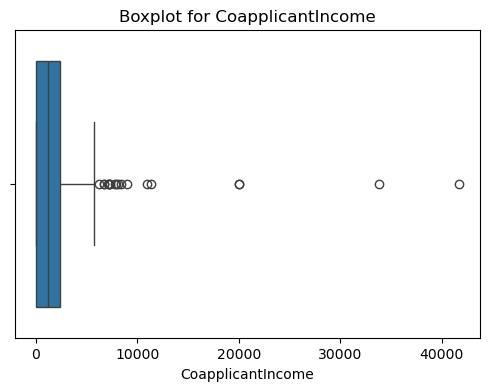

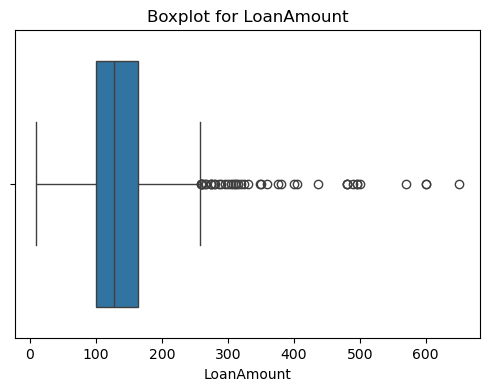

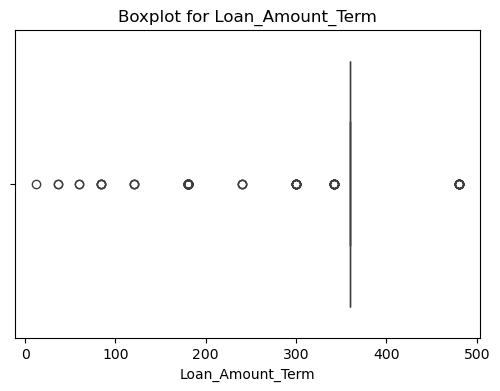

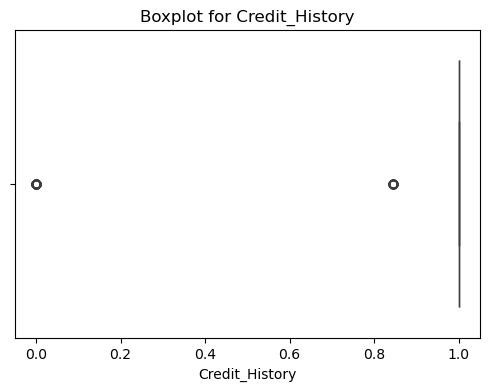

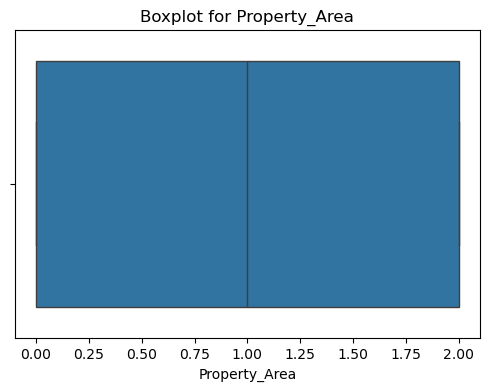

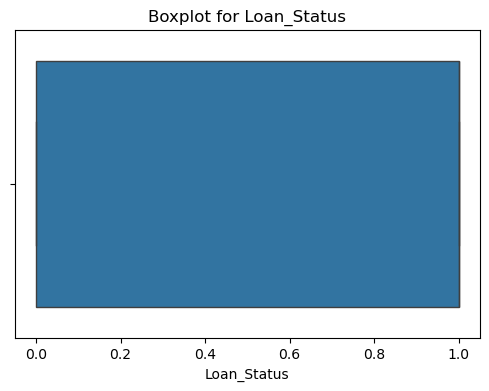

In [22]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [23]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0           5849.0   
1       1        1         1.0          0              0           4583.0   
2       1        1         0.0          0              0           3000.0   
3       1        1         0.0          0              0           2583.0   
4       1        0         0.0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  144.968804             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

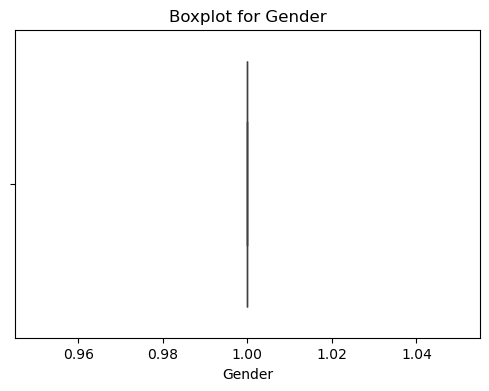

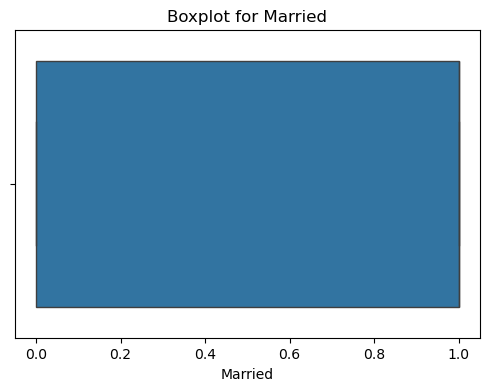

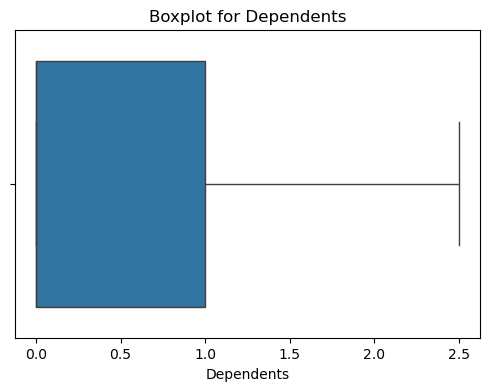

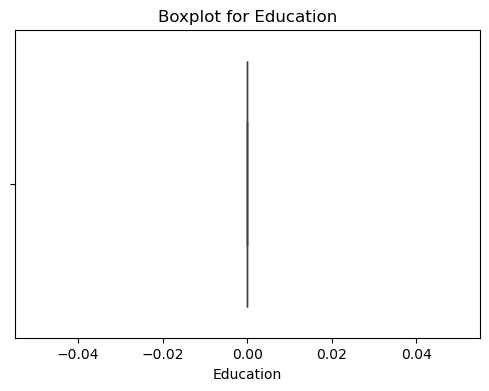

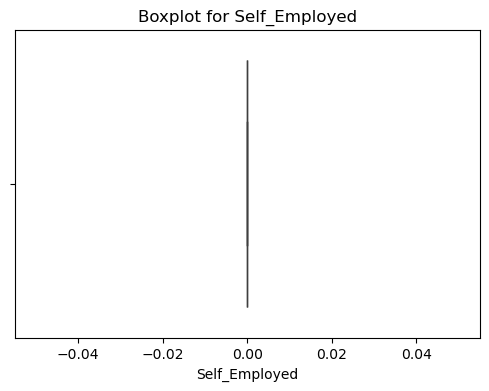

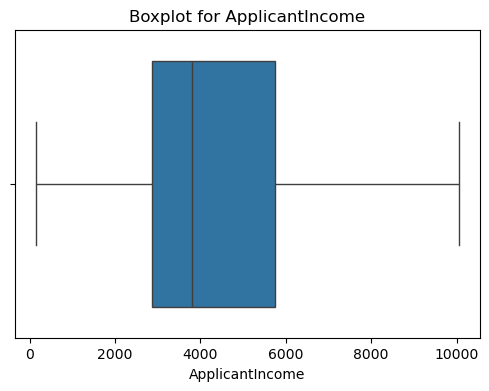

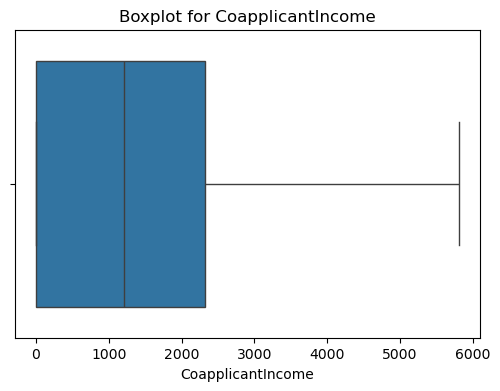

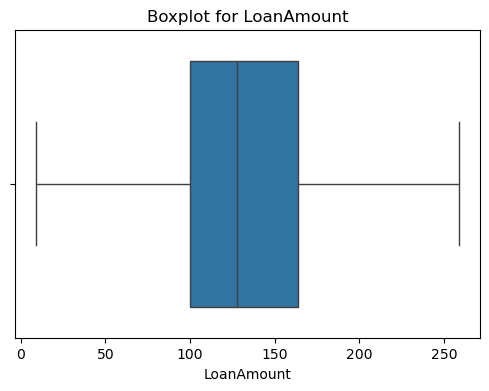

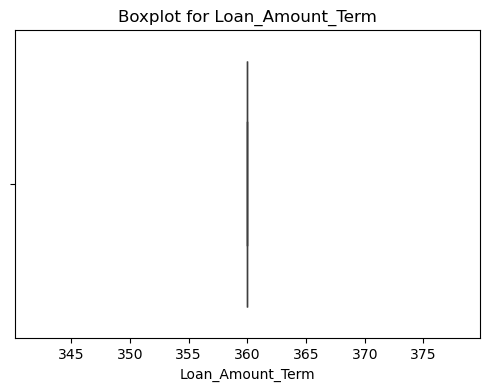

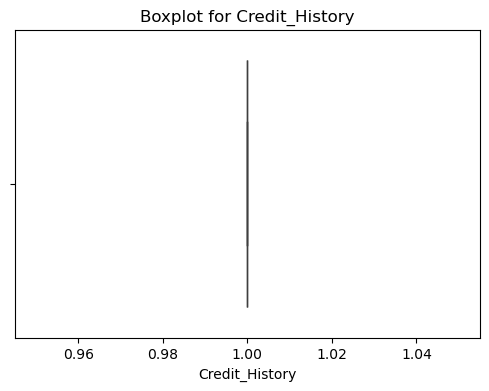

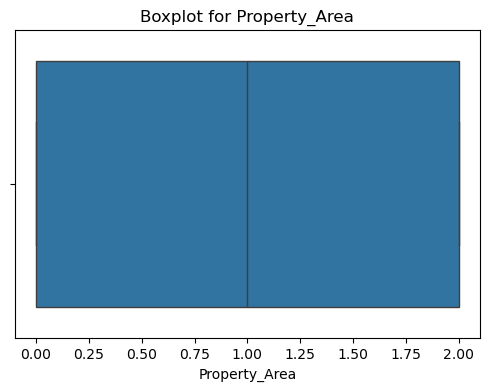

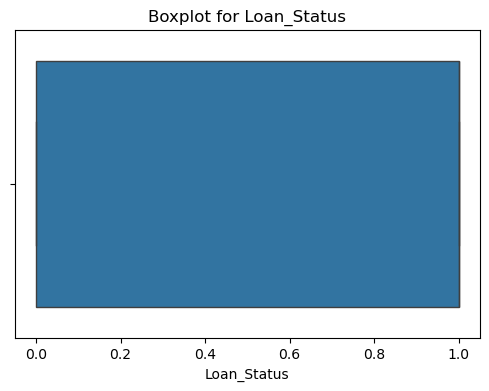

In [24]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [25]:
# Feature Engineering
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [26]:
# Scale Numeric Features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Total_Income', 'LoanAmount', 'Loan_Amount_Term']] = scaler.fit_transform(data[['Total_Income', 'LoanAmount', 'Loan_Amount_Term']])

### Splitting Dataset 

In [28]:
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

((598, 12), (598,))

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((478, 12), (120, 12), (478,), (120,))

In [30]:
print(data['Loan_Status'].value_counts(normalize=True) * 100)

Loan_Status
1    68.729097
0    31.270903
Name: proportion, dtype: float64


In [31]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

print("Class distribution after SMOTE:")
print(Y_train.value_counts())

Class distribution after SMOTE:
Loan_Status
0    326
1    326
Name: count, dtype: int64


### Model training and evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    'Random Forest Classifier' : RandomForestClassifier(n_estimators = 7, 
                                                        criterion = 'entropy', 
                                                        random_state =7),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Logistic Regression (ElasticNet)': LogisticRegression(penalty='elasticnet', 
                                                           solver='saga', 
                                                           l1_ratio=0.5, random_state=42),
    # 'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, learning_rate=0.2, 
                                                    max_depth=7,min_samples_split=10, 
                                                    n_estimators=50, subsample=0.8),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)  
    Y_pred = clf.predict(X_test)  
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print("\nClassification Report:")
    print(classification_report(Y_test, Y_pred))
    print("*" * 30)


Random Forest Classifier Accuracy: 65.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.49      0.45        35
           1       0.77      0.72      0.74        85

    accuracy                           0.65       120
   macro avg       0.59      0.60      0.60       120
weighted avg       0.67      0.65      0.66       120

******************************
Logistic Regression Accuracy: 58.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.38        35
           1       0.73      0.65      0.69        85

    accuracy                           0.58       120
   macro avg       0.53      0.54      0.53       120
weighted avg       0.62      0.58      0.60       120

******************************
Logistic Regression (ElasticNet) Accuracy: 46.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.29     

Based on the results of various models, XGBoost and Random Forest demonstrate the highest accuracy (65%) in this case, while other models such as Gradient Boosting (62.5%) and AdaBoost (58.33%) also perform moderately well.

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_
Y_pred_xgb = best_xgb_model.predict(X_test)
print(f"Optimized XGBoost Accuracy: {accuracy_score(Y_test, Y_pred_xgb) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xgb))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Optimized XGBoost Accuracy: 66.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.40      0.41        35
           1       0.76      0.78      0.77        85

    accuracy                           0.67       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.66      0.67      0.66       120



### Save the Model:

In [37]:
import joblib

joblib.dump(grid_search.best_estimator_, "optimized_xgboost_model.pkl")

['optimized_xgboost_model.pkl']

### XGBoost Model Evaluation Report :

The project successfully demonstrates the utility of machine learning in loan approval prediction. By leveraging features like credit history, marital status, and income, the XGBoost emerged as the most effective model.
 
Model: XGBoost Classifier
Optimization Method: GridSearchCV
Accuracy: 66.67%

### Macro Average:

Precision: 0.59
Recall: 0.59
F1-Score: 0.59

### Weighted Average:

Precision: 0.66
Recall: 0.67
F1-Score: 0.66

### Analysis:
The optimized XGBoost model achieves a good accuracy of 66.67%, with particularly strong performance in predicting class 1 (with a recall of 0.78 and F1-score of 0.77). However, there is a noticeable drop in performance for class 0, where the model struggles with precision and recall, indicating that the model has room for improvement, particularly in distinguishing the minority class (class 0).

In [57]:
#END